In [1]:
# --- Step 1: Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

In [2]:
# --- Step 2: Data Loading ---
try:
    df = pd.read_csv(r"C:\Users\USER\python\heart_disease.csv")
    print(" Data loaded successfully.")
except FileNotFoundError:
    print("'heart_disease.csv' not found")
    raise

print(f"Dataset shape: {df.shape}")
print("Dataset info:")
print(df.info())
print(" First 5 rows:\n", df.head(5))


 Data loaded successfully.
Dataset shape: (303, 14)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
 First 5 rows:
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0    

In [3]:
# --- Step 3: Handle Missing Values & Cleaning ---
df = df.replace("?", np.nan)
df["ca"] = pd.to_numeric(df["ca"], errors="coerce")
df["thal"] = pd.to_numeric(df["thal"], errors="coerce")

# Convert target to binary: 0 = no disease, 1 = disease
df["target"] = df["target"].apply(lambda x: 0 if x == 0 else 1)

# Fill numeric NaN with median
df = df.fillna(df.median(numeric_only=True))

print("Missing values handled.")
print(df.isnull().sum())


Missing values handled.
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
# --- Step 4: Separate Features ---
numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

X = df[numerical_cols + categorical_cols]
y = df["target"]

print("Features and Target separated.")


Features and Target separated.


In [5]:
# --- Step 5: Encode Categorical & Scale Numerical ---

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Encoding and scaling done.")
print("Final feature matrix shape:", X.shape)
print("Final target shape:", y.shape)
print("Columns after preprocessing:\n", X.head())


Encoding and scaling done.
Final feature matrix shape: (303, 18)
Final target shape: (303,)
Columns after preprocessing:
         age  trestbps      chol   thalach   oldpeak        ca  sex_1.0  \
0  0.948726  0.757525 -0.264900  0.017197  1.087338 -0.711131     True   
1  1.392002  1.611220  0.760415 -1.821905  0.397182  2.504881     True   
2  1.392002 -0.665300 -0.342283 -0.902354  1.346147  1.432877     True   
3 -1.932564 -0.096170  0.063974  1.637359  2.122573 -0.711131     True   
4 -1.489288 -0.096170 -0.825922  0.980537  0.310912 -0.711131    False   

   cp_2.0  cp_3.0  cp_4.0  fbs_1.0  restecg_1.0  restecg_2.0  exang_1.0  \
0   False   False   False     True        False         True      False   
1   False   False    True    False        False         True       True   
2   False   False    True    False        False         True       True   
3   False    True   False    False        False        False      False   
4    True   False   False    False        False         Tr

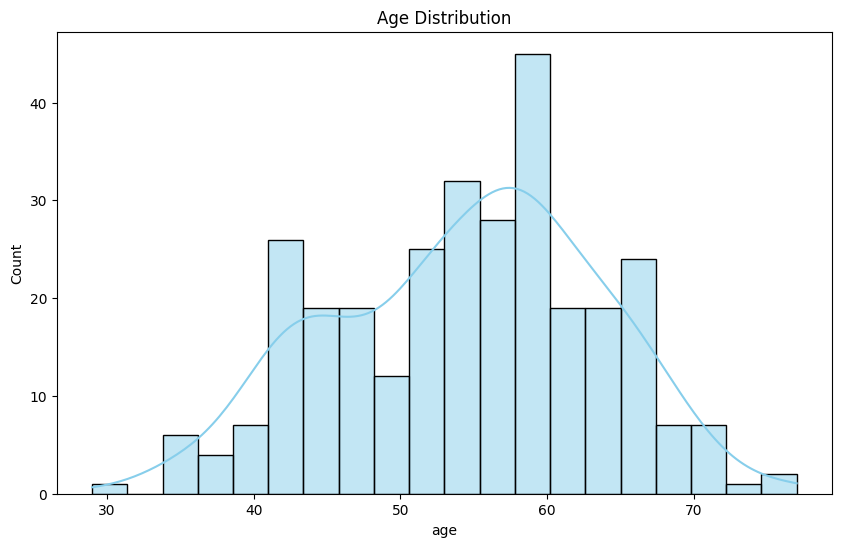

In [6]:
# --- Step 6: Visualization - Age Distribution ---
plt.figure(figsize=(10,6))
sns.histplot(df["age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()


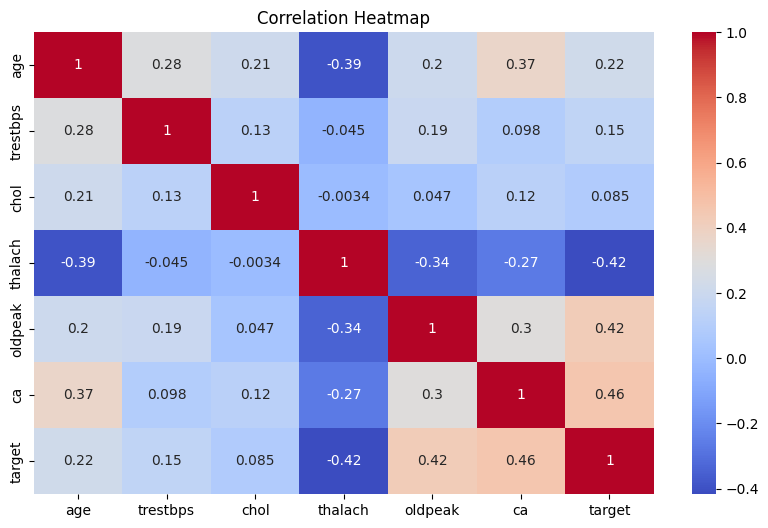

In [7]:
# --- Step 7: Visualization - Correlation Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols + ["target"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


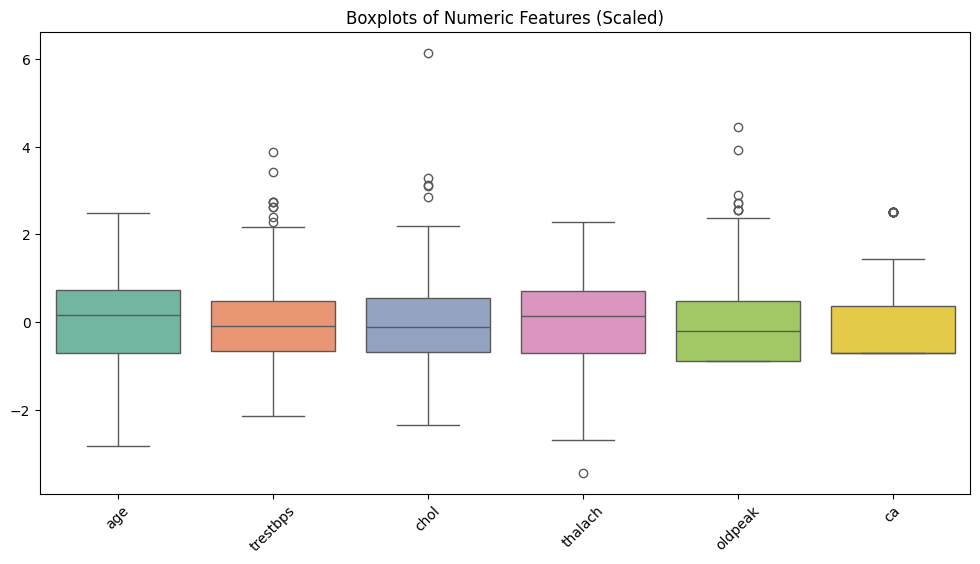

In [8]:
# --- Step 8: Visualization - Boxplots ---
scaled_data = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

plt.figure(figsize=(12,6))
sns.boxplot(data=scaled_df, palette="Set2")
plt.title("Boxplots of Numeric Features (Scaled)")
plt.xticks(rotation=45)
plt.show()


In [9]:
# --- Step 9: Save Cleaned Dataset ---
df.to_csv("heart_data_clean.csv", index=False)
print("Cleaned dataset saved as 'heart_data_clean.csv'")


Cleaned dataset saved as 'heart_data_clean.csv'
